# Stop spacings

In previous lectures, we've toyed with design variables somewhat as though we were playing a computer game: we could choose whatever value we wanted. In reality, these choices involve grand political processes and sometimes involve long-term sunk costs, which may make it uneconomical to change suboptimal designs the agency inherits.

But **stop spacing**---the distance between stops---is one of the easier transit design characteristics to change, at least for buses. While the choice is still influenced by politics, in many cases an agency can eliminate or add stops more easily than it can make a route or fare change. Also, eliminating stops can actually save money, so you don't have to come up with new funds to do it. For these reasons, improving stop spacing can be a sort of "low-hanging fruit" for a transit agency. The exception of course are rail transit lines that have expensive stations.

## Bus stop consolidation

A distinguishing feature of American bus service is that bus stop stops are *very close together.* [Here are the stops for the 7-Haight Noriega](http://www.nextmuni.com/googleMap/?a=sf-muni&r=9) in San Francisco.

<img src='./img/7-line.png' width='750px'/>

Downtown, there are stops every block. Outside downtown, there are stops every two blocks *regardless of block length*, so stops in the Outer Sunset are much closer together than those in Haight-Ashbury. 

Many transit consultants and researchers think that the optimal stop spacing is around .25 miles [400 m]. Vukan Vuchich (author of the most popular transit textbook) says "*Stop spacings should be such that, on the average, buses stop at distances of 400 m [.25 miles] to 600 m [.37 miles], in exceptional cases somewhat closer, bun in no case below 300 m.*" The transit consultant Jarrett Walker (author of the blog and book Human Transit) also supports a 400 m standard and says it's standard in Europe and Australia. According to Walker, 400 m is good because it's the distance lots of people are willing to walk; after 400 m, ridership falls off very sharply. Thus, if you put your stops closer together than 400 m, you're providing "duplicate coverage," as he puts it in this diagram.

<a href="http://humantransit.org/2010/11/san-francisco-a-rational-stop-spacing-plan.html"><img src="img/spacings.jpg" /></a>

In recent years there have been moves toward "stop consolidation," removing stops in order to speed up bus service. Here is an enlightening presentation by a Muni manager on that effort: ["Transit Stops & Stations: Stop spacing, location, & infrastructure."](http://nacto.org/wp-content/uploads/2016/05/1-7_Tanner-Transit-Stop-Spacing-Location-and-Infrastructure_2015.pdf). Maryland Transit Administration (Baltimore's provider) analyzed its stops and found average spacing of [*less than 500 ft*](https://mta.maryland.gov/sites/default/files/Bus_Stop_Optimization_Policy_Pilot.pdf) (page 2)! But this often runs into political obstacles.  For example, consider this news story: [Cafe Owner, [Supervisor] Breed Sway Muni to Keep Two 21-Hayes Stops within a Block](http://sf.streetsblog.org/2015/05/01/cafe-owner-breed-sway-muni-to-keep-two-21-hayes-stops-within-a-block/).

<img src="./img/spacing-table.png" width="75%"/>

To make sense of these effects, now we're going to look at a couple of models.

## Model 1a: The relationship between trip length and door-to-door speed

Every model is unrealistic. They exist to tell stories, to make points memorably so you can remember important principles and communicate them evocatively. Now we are going to consider a model whose lessons are:

+ **The need to stop places a lower bound on door-to-door travel times.**
+ **The longer trips are, the faster door-to-door service you can provide.**

To that end, we are going to consider a model with assumptions very favorable to transit. These assumptions are:

+ No maximum speed. Speed is only limited by acceleration and braking potential.
+ No boarding and alighting time.
+ Demand is extremeley high. Since optimal frequency scales with ridership, we wind up providing such high frequency that wait time at the stop is negligible. Thus, we can ignore wait time and agency cost when we choose stop spacings and whether to have a hierachy of service.

The parameters of the model are:

+ $a$ acceleration rate 
+ $b$ braking rate 
+ $s$ stop spacing 
+ $\hat{v}$ door-to-door speed
+ $\bar{v}$ average speed of the bus, counting stops
+ $l$ average trip length

What we are interested in is the question: what's the fastest door-to-door speed we can provide, given trip lengths $l$?

### Finding $\bar{v}$ in terms of $s$

Since there is no wait time or boarding/alighting time in this model, the door-to-door speed will depend on the speed walking and the speed riding. The walking speed is given, so our first task is to figure out how fast the bus goes on average.

The bus' motion works like this: Between stops, the bus accelerates at rate $a$ for a while from a speed of zero. Then it brakes at rate $b$ until $v=0$ again at the next stop. So the path of speed as the bus goes between two stops looks like this:

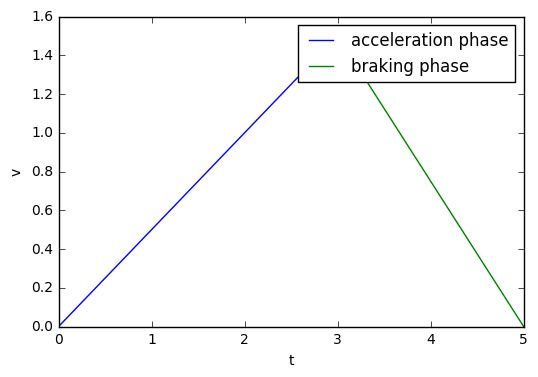

In [31]:
import numpy as np; import matplotlib.pyplot as plt;
T = 5; a = 0.5; b = 0.75;
plt.plot(np.linspace(0,T*b/(a+b)),np.linspace(0,T*b/(a+b))*a,label="acceleration phase")
plt.plot(np.linspace(T*b/(a+b),T),T*b/(a+b)*a - np.linspace(0,T*a/(a+b))*b,label="braking phase")
plt.ylabel(r'v'); plt.xlabel(r't');plt.legend();plt.show()

The area of the triangle above must equal the stop spacing, $s$. The base of the triangle, $T$, is the time between stops. Since the bus spends no time stopped, the average speed $\bar{v}$ is equal to the area of the triangle divided by its base---i.e., the stop spacing divided by the time between stops.

To find $\bar{v}$, the first thing to note is that, if $t_a$ is the amount of time the bus spends accelerating and $T$ is the time between stops, then 

$$
t_a a = (T-t_a) b,
$$

which implies

$$
\frac{t_a}{T} = \frac{b}{a+b}.
$$

That's to say **$b/(a+b)$ is the fraction of the time the bus spends accelerating,** and so

$$T\frac{b}{a+b}$$ 

is the time the bus spends accelerating. It follows that the *distance*, $s_a$, that the bus takes to accelerate is 

$$
s_a := \int_0^{Tb/(a+b)} (at) dt = T^2 \frac{a^2b}{2(a+b)^2},
$$
where $at$ is the speed at time $t$. (Since the bus starts from speed $0$.) Meanwhile, the distance the bus requires to brake is 

$$
s_b := \int_0^{Ta/(a+b)} (bt) dt = T^2 \frac{b^2a}{2(a+b)^2}
$$
by the same logic.

Putting it all together, we get an expression for the total distance between stops in terms of $T$.

$$
s = s_a + s_b = \frac{T^2}{2}\frac{ba^2+ab^2}{(a+b)}.
$$

To make things easier on ourselves, we're going to lump some constants together in the variable

$$
\phi:= \frac{ba^2+ab^2}{2(a+b)},
$$

so

$$
 s = T^2\phi
$$

and so

$$
T = \sqrt{ \frac{s}{\phi}}.
$$

Since $\bar{v}=s/T$ we have

$$
\bar{v} = \frac{s}{T}= \frac{s}{\sqrt{s/\phi}} = \sqrt{\phi s}.
$$

The point is that speed rises as stop spacing increases.

### Finding walk time in terms of $s$

As we saw above, the upside of longer stop spacings is that the bus goes faster. The downside, of course, is that riders have to walk farther to get to a stop. According to Google Maps, people walk through San Francisco at about 2.8 mi/hr (4.5 km/hr), meaning it takes about 20 minutes to walk a mile (about 13.3 minutes to walk a kilometer).

If we assume that destinations and origins are evenly distributed along our route, how long does it take people to walk to the stop on average? Well, as an approximation, we'll say that people walk to the nearest stop. (Note this isn't entirely realistic, as you might walk a little farther to get to a stop in the direction you're traveling). If people walk to the nearest stop, then the longest walking journey is $s/2$ (the guy who starts out exactly half way between stops. The shortest walking journey is $0$ (the guy who starts out right at the stop). So the average distance traveled to get to the stop (assuming origins are evenly distributed), is $s/4$ (the average of $0$ and $s/2$). It follows that if people walk at rate $v_s$, then the average time spent walking to the stop is 

$$\frac{s}{4v_s}.$$

And since people have to walk *from* the stop, too, then the total walk time is 

$$
\frac{s}{2v_s}.
$$

### Finding the fastest possible door-to-door travel speed, $\hat{v}$

Now we know how much time is spent walking and how fast the bus goes. Both turned out to be functions of $s$. So if we want to find the fastest possible door-to-door travel speed, then we need to choose the $s$ that minimizes it. Door-to-door travel time is

$$
T_t = \text{walk time} + \text{ride time} = \frac{s}{2v_s} + \frac{l}{\bar{v}},
$$
which, given our definition of $v$ is 
$$
T_t = \frac{s}{2v_s} + \frac{l}{\phi^{1/2}}s^{-1/2}.
$$

Recall our EOQ formula. If $z=Ax^\alpha + Bx^{-\beta}$, then once we choose $x^*$ to minimize $z$ we get

$$
z^* = A^{\frac{\beta}{\alpha+\beta}}B^{\frac{\alpha}{\alpha+\beta}}\left[ \left(\frac{\beta}{\alpha}\right)^{\frac{\alpha}{\beta+\alpha}}  + \left(\frac{\alpha}{\beta}\right)^{\frac{\beta}{\beta+\alpha}}\right].
$$

For our problem, $A=1/2v_s$, $B=l/\phi^{1/2}$, $\alpha=1$,$\beta=1/2$. So when we plug these parameters into the formula we get

$$
T_t^* = \left(\frac{1}{2v_s}\right)^{1/3} \left( \frac{l}{\phi^{1/2}} \right)^{2/3} \bigg[ (2)^{1/3} + (1/2)^{2/3} \bigg], 
$$

which when we simplify becomes

$$
T_t^* = \frac{3}{2}\left(\frac{1}{v_s\phi}\right)^{1/3}l^{2/3}.
$$

Now, wrapping up, we plug in this to our identity for door-to-door travel speed and get

$$
\hat{v}(l) = \frac{l}{T_t^*} = \frac{2}{3}\bigg(l\phi v_s\bigg)^{1/3},
$$

which is $\hat{v}$ for a given trip length. Here is that function plotted.

### Take-home lessons

The important lesson is that $\hat{v}$ rises with the $1/3$ power of $l$. So the longer trips are, the faster the door-to-door speed is. In other words, travel time scales lower than linearly with speed. The reason was that when trips are longer, stops could be spaced further apart, which let the bus go faster. 

Also, in spite of the fact there was no upper bound on travel speed, the fact the vehicle needed to speed up and slow down kept us from providing an infinite speed.

## Model 1b: An extension with hierarchies

Now we are look at a new model that has Model 1a nested inside of it. In this model, there is a hierarchy of service. There is an "express" service with far-apart stops that goes quickly, and a slower "feeder" service with close-together stops that exists to get people to and from the express stops. Here is a diagram:

<img src="./img/spacing.png" width="50%"/>

Our task now is to choose the express stop spacing, $s_e$, in order to maximize the door-to-door travel speed $\hat{v}(l)$. The key insight is this: this model is exactly the same as the one above, but rather than a "walk speed" $v_s$ we have an "access speed" (the speed of the feeder) that is equal to $\hat{v}(s_e/2)$. And just as above people walked on average a distance $v_w$, here they ride the feeder a distance $s_e/2$. Therefore, door-to-door travel time is now

$$
T_t = \frac{s_e}{2\hat{v}(s_e/2)} + \frac{l}{\phi^{1/2}}s_e^{-1/2},
$$

where the first term is time spent on the feeder and the second is time spent on the express service.

When we plug $\hat{v}(s_e/2)$ into our expression for travel time, we get

$$
T_t = \frac{1}{2\cdot \frac{2}{3}(v_w \phi )^{1/3}}s_e^{2/3} + \frac{l}{\phi^{1/2}}s_e^{-1/2}=  \frac{4}{3(v_w \phi )^{1/3}}s_e^{2/3} + \frac{l}{\phi^{1/2}}s_e^{-1/2}.
$$

This is another EOQ formula, only this time $\beta=2/3$ whereas in Model 1b $\beta=1/2$. If we use our EOQ formula to minimize this expression, we get

$$
T_t^* = k \cdot \left(\frac{1}{v_s} \right)^{1/7}\left( \frac{1}{\phi} \right)^{3/7} l^{4/7},
$$

where $k$ are a bunch of constants arranged in a way that doesn't really matter to us.

To finish, we take the ratio $\hat{v}_e =l/T_t$ to find

$$
\hat{v}_e(l) = k v_s^{1/7} \phi^{3/7}l^{3/7}.
$$

### Comparing transfers vs. direct service

The point of building the model with transfers is to see whether adding transfers helps speed up people's trips. Without crunching a bunch of numbers, we can compare the general forms of $\hat{v}(l)$ (without transfers) and $\hat{v}_e(l)$ (with transfers).

$$
\hat{v}(l) = A l^{2/3}
$$

$$
\hat{v}_e(l) = B l^{4/7}
$$

Where $A$ and $B$ stand for all the other constants multiplied by $l$. Note the different powers of $l$ in each expression. Because they have different powers, no matter what $A$ and $B$ are, when we compare the two functions the plot will look like this

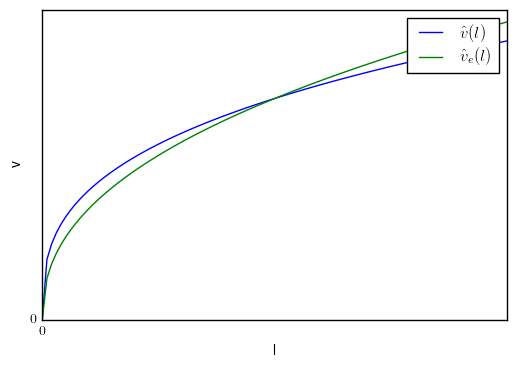

In [20]:
import numpy as np; import matplotlib.pyplot as plt;
plt.rc('text', usetex=True)
l = np.linspace(0,2,100)
A = 1
B = 1
vhat = A* l**(1./3.)
vhat_e = B * l **(3./7.)
plt.plot(l, vhat, label= r"$\hat{v}(l)$")
plt.plot(l,vhat_e,label=r"\hat{v}_e(l)")
plt.xlabel(r"l");plt.ylabel(r"v");
plt.xticks([0]);plt.yticks([0]);
plt.legend()
plt.show()

That is, $\hat{v}(l)$ will be higher for very low values of $l$, while $\hat{v}_e(l)$ will be higher for high values of $l$. At some point, they will intersect. No matter what $A$ and $B$ are these facts will hold. (Try it in Desmos if you don't believe me.)